# Описание проекта

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. Наши ближайшие задачи — выявление профилей покупателей, а также полноценный анализ товарного ассортимента. «Пока все ещё тут» — мы создаём уют!

# Описание данных
Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока
все ещё тут».

<b>Колонки в ecommerce_dataset.csv:</b>
* date — дата заказа;
* customer_id — идентификатор покупателя;
* order_id — идентификатор заказа;
* product — наименование товара;
* quantity — количество товара в заказе;
* price — цена товара.

# Открытие файла и изучение данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats

In [2]:
# Загрузка файла
df = pd.read_csv('datasets/ecommerce_dataset.csv')

# Увеличение ширины колонки
pd.options.display.max_colwidth = 150

#Смотрим общую информацию
display(df.head())
display(df.describe())
print('Общая информация:')
df.info()
print()
print('Количество пропуков:')
print(round((df.isna().mean()*100),2))
print()
print('Количество полных дубликатов:', df.duplicated().sum())
print()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB

Количество пропуков:
date           0.0
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
dtype: float64

Количество полных дубликатов: 0



В нашем распоряжении датасет с 6737 строками. Полных дубликатов и пропусков не обнаружено. Необходимо поменять формат дат c int на datetime, привести к нижнему регистру наименования товаров и добавить столбец с выручкой.

Средняя цена товара - 462 у.е при стандартном отклонении в 871 у.е.<br>
Среднее количество товара в заказе - 2,5 при стандартном отклонении 15,3.<br>
Максимальное количество товара в заказе - 1000. Максимальная цена за товар 14917 у.е.

# Предобработка данных

In [3]:
# Применим нижний регистр для товаров
df['product'] = df['product'].str.lower()
# заменим ё на е
df['product'] = df['product'].str.replace('ё','е', regex=True)
df.head(2)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0


In [4]:
# Добавим выручку
df['revenue'] = df['price'] * df['quantity']
df[df['quantity']>1].head(2)

,date,customer_id,order_id,product,quantity,price,revenue
10,2018100111,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,"вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, attribute, ahs331",10,82.0,820.0
13,2018100115,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,"крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар*, 1110027",96,38.0,3648.0


In [5]:
# Поменяем формат дат
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

# Выделим в отдельные столбцы разные уровни агрегации даты
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.dayofweek + 1
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dt_date'] = df['date'].dt.date
df.head(2)

,date,customer_id,order_id,product,quantity,price,revenue,day,weekday,month,year,dt_date
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,1,1,10,2018,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,194.0,1,1,10,2018,2018-10-01


In [6]:
# Отсечем первые два слова в названиях товаров для упрощения их категоризации
df['name'] = df['product'].apply(lambda x: x.split(' ')[:2]).apply(lambda x: ' '.join(x))
df.head()

,date,customer_id,order_id,product,quantity,price,revenue,day,weekday,month,year,dt_date,name
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,1,1,10,2018,2018-10-01,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,194.0,1,1,10,2018,2018-10-01,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,1,1,10,2018,2018-10-01,радермахера d-12
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,1,1,10,2018,2018-10-01,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,1,1,10,2018,2018-10-01,циперус зумула


In [7]:
# Взглянем на уникальные названия
df['name'].unique().tolist()

['комнатное растение',
 'радермахера d-12',
 'хризолидокарпус лутесценс',
 'циперус зумула',
 'шеффлера лузеана',
 'юкка нитчатая',
 'настенная сушилка',
 'таз пластмассовый',
 'чехол для',
 'вешалка для',
 'сушилка для',
 'чехол eurogold',
 'крючок одежный',
 'корзина мягкая',
 'мини-сковорода marmiton',
 'сковорода алюминиевая',
 'стеклянная крышка',
 'доска гладильная',
 'сумка-тележка 2-х',
 'многолетнее растение',
 'рассада зелени',
 'муляж "райские',
 'муляж банан,',
 'муляж виноград',
 'муляж гранат',
 'муляж груша',
 'муляж груша,',
 'муляж зеленое',
 'муляж клубника',
 'муляж красное',
 'муляж лимон,',
 'муляж мандарин,',
 'муляж перец,',
 'муляж персики',
 'муляж томат,',
 'муляж черешня',
 'щетка-сметка 3-х',
 'щетка-сметка 4-х',
 'сумка для',
 'тарелка обеденная',
 'вилка столовая',
 'ложка столовая',
 'ложка чайная',
 'нож столовый',
 'герань домашняя',
 'ерш для',
 'пеларгония зональная',
 'котел алюминиевый',
 'суккулент микс',
 'эхеверия перл',
 'набор прищепок',
 'ковр

In [8]:
# Составим на основе уникальных названий товаров категории и вручную заполним их ключевыми словами
category_dict = {
    'интерьер':[
        'муляж', 'искусственн', 'светильник', 'карниз', 'фоторамка', 'полки', 'картина', 'пуф', 'композиция'
    ],

    'уход за одеждой':[
        'сушилка', 'чехол', 'вешал', 'крючок одежный', 'набор прищепок',
        'плечики пластмассовые', 'подрукавник', 'ролик', 'глажения', 'рукав', 'гладильн', ' вещей'
    ],
    
    'хозяйственные товары':[
        'таз', 'ерш', 'дозатор', 'мусорный контейнер', 'перчатки', 'щетка', 'биопорошок', 'мыло',
        'чистящий крем', 'паста', 'пена', 'контейнер', 'веник', 'швабр', 'ведр', 'подголовник',
        'сиденье', 'корыто', 'сметка', 'средство', 'держатель', 'пробка', 'зажигал', 'губка', 'антижир',
        'термометр', 'ковш', 'пламени', 'ополаскиватель', 'мыльница', 'кольца для штор', 'вантуз', 'соль',
        'крючок проволочный', 'насадка', 'фал капроновый', 'штанга', 'маска', 'окномойка', 'шнур', 'мешок', 'совок',
        'тряпка', 'антинакипин', 'шпагат'
    ],
    
    'посуда и кухонные принадлежности':[
        'посуды','сковорода', 'крышка', 'тарелка', 'вилка', 'ложка', 'нож', 'котел', 'набор кружек', 'фужер',
        'скатерть','кувшин', 'толкушка', 'свистком', 'банка', 'полотенце кухонное', 'противень', 'салфетка',
        'масленка', 'салатник', 'чайный', 'рыбочистка', 'овощеварка', 'терка', 'кружка',
        'лопатка', 'салфетница', 'стакан', 'овощечистка', 'лоток', 'кухонных полотенец', 'мантоварка', 'бокал', 'кисточка',
        'скребок', 'картофелемялка', 'набор форм', 'миска', 'пресс', 'столовых', 'термос', 'блюд', 'разделочная',
        'штопор', 'бульонница', 'емкость', 'кастрюля', 'хлебница', 'салфетки', 'чайник заварочный', 'форма', 'орехоколка',
        'скалка', 'венчик', 'сито', 'тортница', 'бидон', 'сотейник', 'сахарница', 'соко', 'половник'
    ],
    
    'растения и сад':[
        'комнатное растение', 'd-', 'd12','d23', 'рассада', 'однолетнее растение', 'суккулент', 'бегония', 'герань',
        'афеляндра скуарроса', 'тимьян', 'кориандр', 'пеларгония', 'хризантема', 'душица-орегано', 'урна', 
        'бархатцы','космея', 'морковь', 'настурция', 'огурец', 'петуния', 'алиссум', 'гвоздика', 'годеция', 'календула',
        'кореопсис', 'флокс', 'лапчатка', 'цинерария', 'эшшольция', 'ель', 'гиностемма', 'кипарисовик', 'роза',
        'кодонанта', 'цикламен', 'крокусы', 'гипсофила', 'аквилегия', 'базилик', 'амброзия', 'земляника', 'томат',
        'укроп', 'калла', 'тюльпан', 'табак', 'калибрахоа', 'ранункулус', 'овсянница', 'георгина', 'вербейник',
        'котовник', 'колокольчик', 'цинния', 'ясколка', 'эхинацея', 'смолевка', 'виола', 'платикодон', 'лилейник',
        'фуксия', 'папоротник', 'вербена', 'дыня', 'астра', 'виноград', 'пиретрум', 'лобелия', 'кашпо', 'капуста',
        'клубника', 'седум', 'незабуд', 'энотера', 'вероника', 'арбуз', 'хоста', 'осина', 'барвинок', 'фиалка', 
        'гайлардия', 'монарда', 'ромашка', 'бузульник', 'физостегия', 'камнеломка', 'бадан', 'валериана',
        'петрушка', 'кассет', 'лаватера', 'рудбекия', 'рукола', 'анемона', 'солидаго', 'гимнокалициум', 'комнатная',
        'дендробиум', 'эхинокактус', 'антуриум', 'эхеверия', 'горшк', 'небесная лазурь'
    ],
    
    'текстиль для дома':[
        'коврик', 'ковер', 'набор ковров', 'плед', 'простыня', 'штора', 'комплект для ванной', 'наматрасник', 'халат',
        'полотенце', 'покрывало', 'одеял', 'махровых', 'ткань', 'наматрацник', 'наволочка', 'подушка'
    ],

    'строительство и ремонт':[
        'стремянк', 'стяжка оконная', 'крепеж', 'пружина', 'петля', 'сверло', 'набор сверел', 'сварка',
        'угол', 'линейка', 'шило', 'ручка-скоба', 'инструмент', 'штангенциркуль', 'напильник', 'фиксатор',
        'оцинк', 'завертка', 'решетка', 'шпингалет', 'основание для пробки'
    ],
    
    'техника':[
        'миксер', 'утюг', 'чайник электрический', 'фен', 'электронные', 'механические', 'пылесос', 'кипятильник'
    ],
    
    'хранение и порядок':[
        'сумка', 'тележк', 'кофр', 'ящик', 'короб', 'комод', 'подставка', 'этажерка', 'полка', 'обувница',
        'стеллаж', 'корзин'
    ],
}

In [9]:
# Функцией присвоим категории товарам по ключевым словам
def categorize_product(product):
    for category, items_of_list in category_dict.items():
        for item in items_of_list:
            if item in product:
                return category
    return 'Нет категории'
df['category'] = df['product'].apply(categorize_product)

print('Товаров без категории: {}'.format(len(df[df['category']=='Нет категории'])))
df.head(2)

Товаров без категории: 0


,date,customer_id,order_id,product,quantity,price,revenue,day,weekday,month,year,dt_date,name,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,1,1,10,2018,2018-10-01,комнатное растение,растения и сад
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,194.0,1,1,10,2018,2018-10-01,комнатное растение,растения и сад


In [10]:
# Просмотр аномальных закупок
df[df['quantity'] > 100].sort_values(by='quantity', ascending=False)

,date,customer_id,order_id,product,quantity,price,revenue,day,weekday,month,year,dt_date,name,category
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000,675.0,675000.0,18,2,6,2019,2019-06-18,вантуз с,хозяйственные товары
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,49432.0,11,2,6,2019,2019-06-11,вешалки мягкие,уход за одеждой
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0,15300.0,20,1,5,2019,2019-05-20,муляж яблоко,интерьер
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,5800.0,10,1,12,2018,2018-12-10,ручка-скоба рс-100,строительство и ремонт
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,8670.0,1,4,11,2018,2018-11-01,муляж яблоко,интерьер
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2850.0,11,4,10,2018,2018-10-11,крепеж для,строительство и ремонт
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",150,38.0,5700.0,11,4,10,2018,2018-10-11,пружина дверная,строительство и ремонт
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2850.0,16,2,10,2018,2018-10-16,крепеж для,строительство и ремонт
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",150,38.0,5700.0,16,2,10,2018,2018-10-16,пружина дверная,строительство и ремонт
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0,3000.0,23,6,3,2019,2019-03-23,плечики пластмассовые,уход за одеждой


Покупку 1000 вантузов на сумму 675000 можно явно считать выбросом.<br>
Другие крупные покупки нельзя отнести к покупкам для личного пользования - похоже на оптовые закупки юридических лиц. Удалим выбросы по 99 перцентилю. Так же по таблице заметны неполные дубликаты у крепежа и пружины дверной. Нужно проверить датасет на неполные дубликаты.

In [11]:
# Определим аномальные значения 99-м перцентилем
upper_threshold = np.percentile(df['quantity'], 99)
print('99-й перцентиль товаров в заказе: {:.0f} шт'.format(upper_threshold))
# кол-во аномальных значений в столбце 'quantity'
abnormal = df[df['quantity'] > upper_threshold]['quantity'].count()
print('Количество строк с аномальными значениями: {}'.format(abnormal))
print('Доля аномальных значений от общего количества записей: {:.1%}'.format(abnormal / len(df))) 

99-й перцентиль товаров в заказе: 27 шт
Количество строк с аномальными значениями: 68
Доля аномальных значений от общего количества записей: 1.0%


Не более 1% лога имеют 27 и более товара в заказе. Принимаю решение удалит эти строки.

In [12]:
# Удаляем аномальные значения
df = df[(df['quantity'] < upper_threshold)]
df.shape

(6669, 14)

In [13]:
# Поиск неполных дубликатов по столбцам customer_id, order_id, product и revenue
# Тоесть один и тот же пользователь сделал тот же заказ с тем же товаром и на туже самую сумму.
other_duplicates = df[df[['customer_id', 'order_id', 'product', 'revenue']].duplicated() == True][
    ['date', 'order_id', 'product', 'revenue']]
display(other_duplicates.head())
print('Количество неполных дубликатов: {} строк'.format(len(other_duplicates)))
print('Доля дубликатов от общего количества записей: {:.2%}'.format(len(other_duplicates)/len(df)))

,date,order_id,product,revenue
58,2018-10-02 18:00:00,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,3299.0
59,2018-10-02 19:00:00,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,3299.0
60,2018-10-02 20:00:00,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,3299.0
63,2018-10-03 04:00:00,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,3299.0
94,2018-10-04 13:00:00,68522,эвкалипт гунни d-17 см h-60 см,1409.0


Количество неполных дубликатов: 1857 строк
Доля дубликатов от общего количества записей: 27.85%


Судя по первым четырем записям которые отличаются только датой и временем можно предположить, что в логе данных мы не видим тип отслеживания операции ("создан", "подтвержден", "оплачен", "отправлен", "доставлен") или просто банально произошли сбои при записи или выгрузке данных. Принимаю решение удалить более 27% записей.

In [14]:
# Удалим дубликаты в столбцах 'customer_id', 'order_id', 'product', 'revenue' и запишем данные в новую таблицу
df2 = df.drop_duplicates(['customer_id', 'order_id', 'product', 'revenue'])
df2.shape

(4812, 14)

<b>Выводы:</b><br>
Привели даты к нужному типу и выделили дополнительные агрегации дат. Добавили новый столбец с выручкой. Наименования товаров привели к единому виду и провели категоризацию товаров. Почистили дотасет от аномальных выбросов и удалили неполные дубликаты.
Очищенный датасет имеет 4812 строк вместо 6737 при сырых данных.

# Исследовательский анализ данных

In [15]:
# Минмиальная дата
dt_min = df2['date'].min()
# Максимальная дата
dt_max = df2['date'].max()
# Уникальных пользователей
users = df2['customer_id'].nunique()
# Уникальных заказов
orders = df2['order_id'].nunique()

print('Данные за период с {} по {}'.format(dt_min, dt_max))
print('Покупку совершили {} уникальных пользователя'.format(users))
print('Всего оформлено {} заказов'.format(orders))

Данные за период с 2018-10-01 00:00:00 по 2019-10-31 14:00:00
Покупку совершили 2403 уникальных пользователя
Всего оформлено 2732 заказов


Временной период лога год и один месяц. Можно посмотреть есть ли сезонность в покупках.

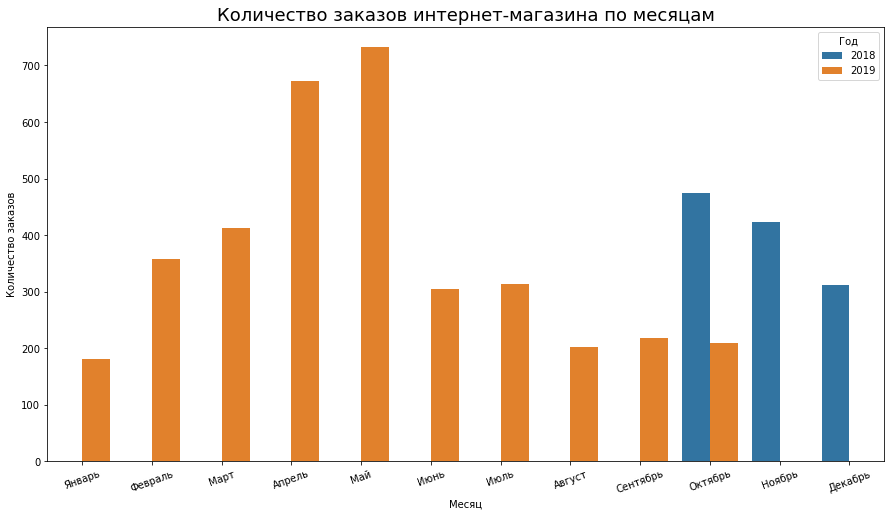

In [16]:
# Посмотрим распределение количества заказов и выручки по месяцам
month = df2.pivot_table(index={'month', 'year'}, values='revenue', aggfunc={'count', 'sum'}).reset_index()

# Количество заказов по месяцам
plt.figure(figsize=(15,8))
sns.barplot(data=month, x = 'month', y = 'count', hue = 'year')
plt.title('Количество заказов интернет-магазина по месяцам', fontsize=18)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(np.arange(12), [
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
], rotation=20)
plt.legend(title='Год')
plt.show()

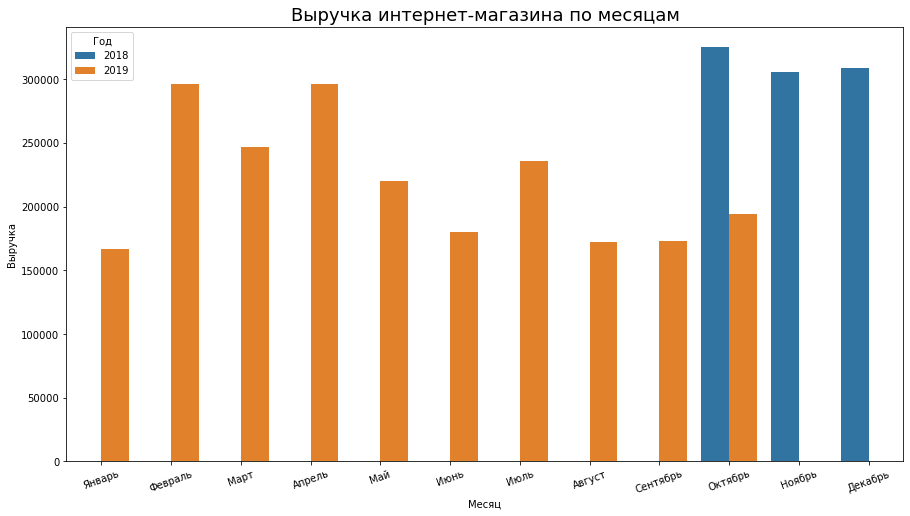

In [17]:
# Количество выручки по месяцам
plt.figure(figsize=(15,8))
sns.barplot(data=month, x = 'month', y = 'sum', hue = 'year')
plt.title('Выручка интернет-магазина по месяцам', fontsize=18)
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(np.arange(12), [
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
], rotation=20)
plt.legend(title='Год')
plt.show()

Начиная с февраля 2019 наблюдается увеличение числа заказов вплодь до пиковых значений в апреле и мае, что косвенно указывает на сезонный характер. Например садоводы закупают семена для выращивания и садоводческие принадлежности. После чего покупательская активность заметно снижается. Можно заметить, что количество заказов и выручка в октябре 2018 года на порядок выше тех же показателей 2019 года. Это может свидетельствовать об негативном изменении спроса. К сожалению данных не хватает, чтобы в полной мере сравнить показатели год к году.

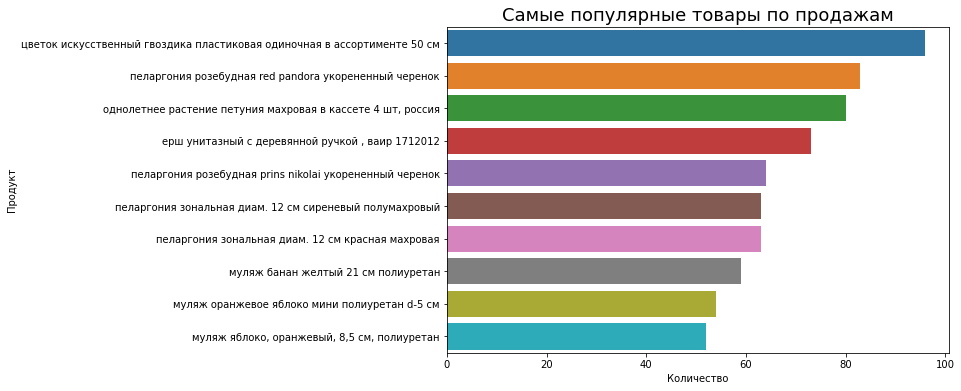

In [18]:
# Посмотрим на самые популярные и прибыльные товары
goods = df2.pivot_table(index = 'product', aggfunc ={'quantity':'sum', 'revenue':'sum'})

# Самые популярные
goods_q= goods.sort_values(by='quantity', ascending=False).head(10)
plt.figure(figsize=(9,6))
sns.barplot(x='quantity', y=goods_q.index, data=goods_q)
plt.title('Самые популярные товары по продажам', fontsize=18)
plt.xlabel('Количество')
plt.ylabel('Продукт')
plt.show()

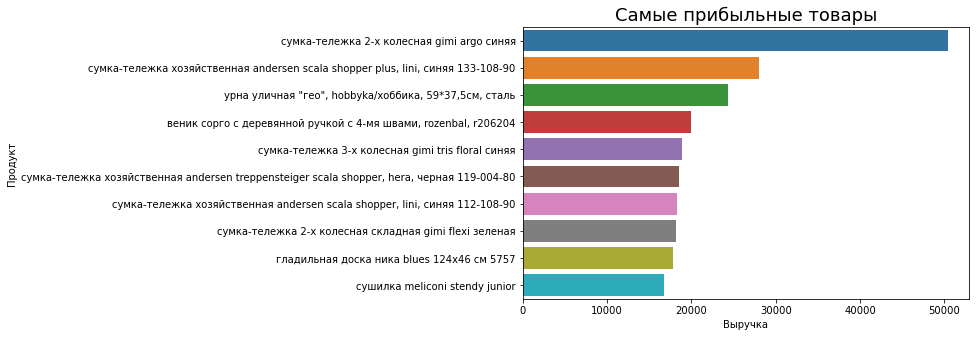

In [19]:
# Самые прибыльные
goods_r= goods.sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x='revenue', y=goods_r.index, data=goods_r)
plt.title('Самые прибыльные товары', fontsize=18)
plt.xlabel('Выручка')
plt.ylabel('Продукт')
plt.show()

Самыми популярными товарами являются как правило товары из категорий "растения и сад" и "интерьер". Они довольно не дорогие и их берут по несколько штук за раз. Самыми прибылиными товарами являются товары категории "хранение и порядок" за счет своих больших цен за еденицу товара.

In [20]:
# Создадим функцию сбора кумулятивных значений
def df_cum(df, category):
    # Создаем массив дат и групп
    dates_groups = df2[['date', category]].drop_duplicates()
    # Соберем агрегированные кумулятивные данные о заказах
    result = dates_groups.apply(
        lambda x: df2[np.logical_and(df['date'] <= x['date'], df[category] == x[category])].agg({
            'date': 'max', 
            category: 'max', 
            'order_id': pd.Series.nunique,
            'customer_id': pd.Series.nunique,
            'revenue': 'sum',
            'quantity': 'sum'
        }), axis=1).sort_values(by=['date', category])

    # Переименуем столбцы
    result.columns = ['date', category, 'orders', 'customers', 'revenue', 'quantity']
    return result

In [21]:
# Кумулятивные даннные по категориям
cum = df_cum(df2, 'category')
cum.head()

,date,category,orders,customers,revenue,quantity
0,2018-10-01 00:00:00,растения и сад,1,1,1037.0,7
7,2018-10-01 08:00:00,уход за одеждой,1,1,824.0,1
8,2018-10-01 08:00:00,хозяйственные товары,1,1,269.0,1
9,2018-10-01 09:00:00,уход за одеждой,2,2,1498.0,2
10,2018-10-01 11:00:00,уход за одеждой,3,3,2318.0,12


In [22]:
# Сделаем функцию для постройки графиков по кумулятивным данным
def plot_groups(df, column, category, date, title, ylabel):
    # df - это Датасет; 
    # column - название столбца с кумулятивными данными; 
    # category - группировка по категориям; 
    # date - столбец с датами; 
    fig, ax = plt.subplots(figsize=(15,10))
    for name in df[category].unique():
        df_category = cum[cum[category] == name]
        ax.plot(df_category[date], df_category[column], '-', label = name)
    ax.grid()
    ax.legend()
    plt.title(title, fontsize=18)
    plt.xlabel('Дата')
    plt.ylabel(ylabel)
    plt.xticks(rotation=20)
    plt.show()

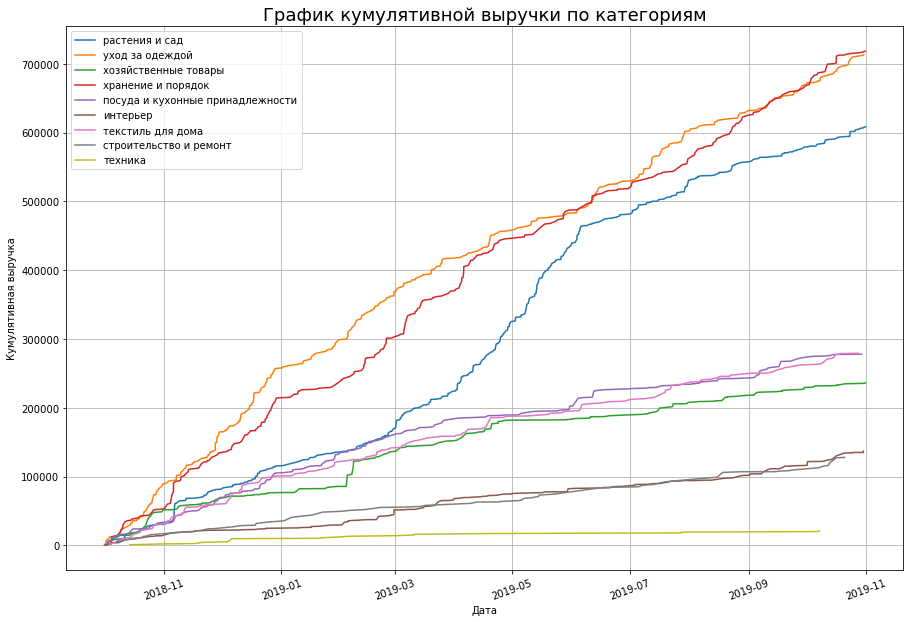

In [23]:
# Строим график кумулятивной выручки
plot_groups(cum,'revenue','category','date','График кумулятивной выручки по категориям','Кумулятивная выручка')

Самыми прибыльными категориями являются "хранение и порядок", "уход за одеждой" и "растения и сад". Последняя из которых имеет сезонный характер. На графике видно, как кумулятивная выручка товаров категории "растения и сад" начиная с марта начинают быстро расти и уже в июне она вплотную приближаются к кумулятивным выручкам категорий "хранение и порядок" и "уход за одеждой".

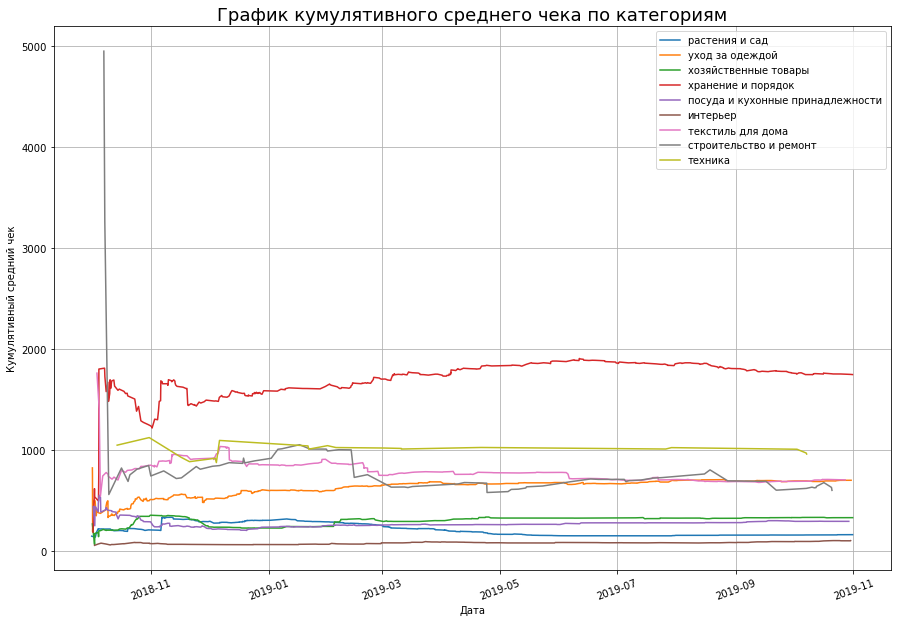

In [24]:
# Вычислим кумулятивный средний чек
cum['avg_price'] = cum['revenue']/cum['quantity']
# Строим график кумулятивного среднего чека
plot_groups(cum,'avg_price','category','date','График кумулятивного среднего чека по категориям','Кумулятивный средний чек')

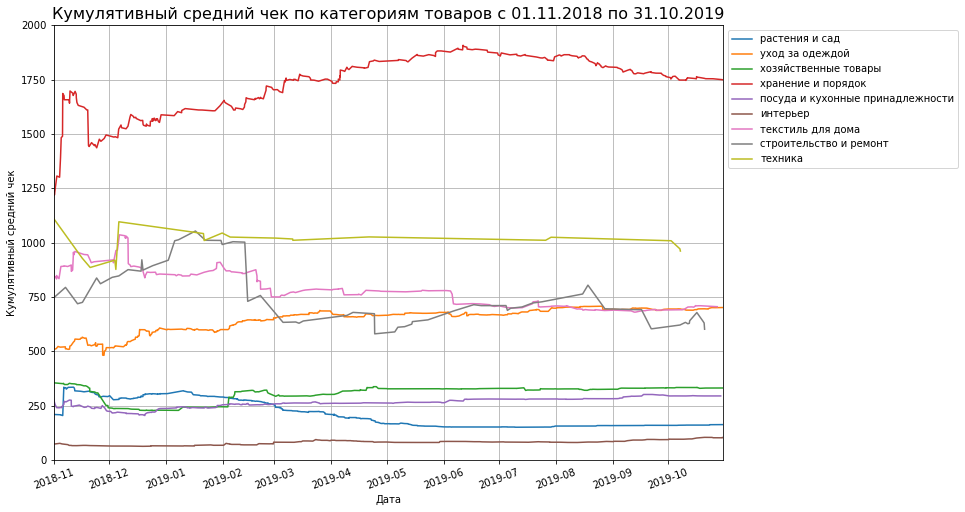

In [25]:
# Посмотрим в приближении и без выброса
fig, ax = plt.subplots(figsize=(12,8))
for name in df['category'].unique():
    df_category = cum[cum['category'] == name]
    ax.plot(df_category['date'], df_category['avg_price'], '-', label = name)
ax.axis([pd.to_datetime('2018-11-01'), pd.to_datetime('2019-10-31'), 0, 2000])
ax.grid()
ax.legend(bbox_to_anchor=(1, 1))
plt.title('Кумулятивный средний чек по категориям товаров c 01.11.2018 по 31.10.2019', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=20)
plt.show()

Средний чек категории "хранение и порядок" довольно сильно превосходит другие категории с средним чеком за 1750. Далее идут категории "техника", "текстиль для дома", "уход за одеждой" и "строительство и ремонт" с средним чеком в диапазоне от 600 до 1000. Аутсайдерами по среднему чеку являются "интерьер", "растения и сад", "хозяйственные товары" и "посуда и кухонные принадлежности".

In [26]:
# Группировка заказов по пользователям и категориям с подсчетом количества уникальных заказов
ordersbycustomer = (df2
                    .groupby(['category','customer_id'], as_index=False)
                    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
                    .reset_index()
                   )

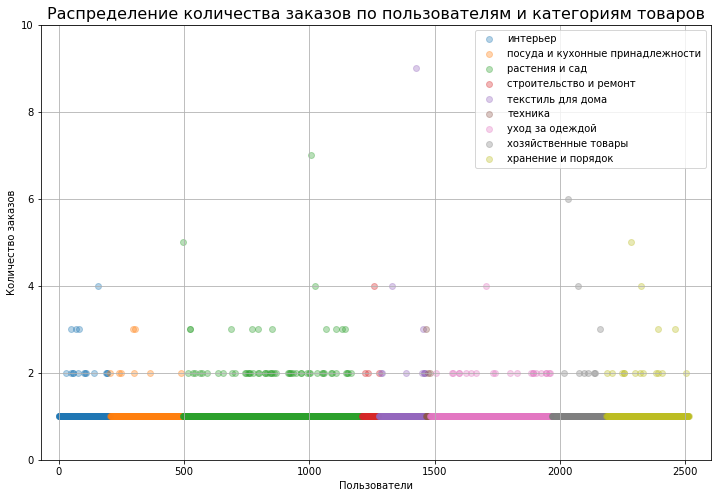

In [27]:
# Строим график распределения количества заказов по пользователям
fig, ax = plt.subplots(figsize=(12,8))
for name in ordersbycustomer['category'].unique():
    df_customers = ordersbycustomer[ordersbycustomer['category'] == name]
    ax.scatter(df_customers.index, df_customers['order_id'], alpha=0.33, label = name)
    ax.axis([-70, 2600, 0, 10])
ax.grid()
ax.legend(bbox_to_anchor=(1, 1))
plt.title('Распределение количества заказов по пользователям и категориям товаров', fontsize=16)
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

По графику видно, что пользователи делали в большинстве своем от одного до трех заказов.

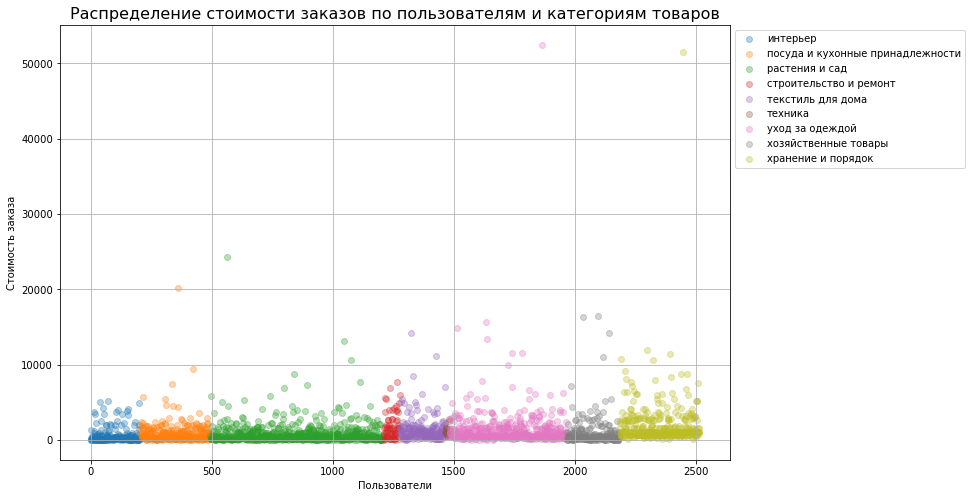

In [28]:
# Строим график распределения стоимости заказов по пользователям
fig, ax = plt.subplots(figsize=(12,8))
for name in ordersbycustomer['category'].unique():
    df_customers = ordersbycustomer[ordersbycustomer['category'] == name]
    ax.scatter(df_customers.index, df_customers['revenue'], alpha=0.33, label = name)
ax.grid()
ax.legend(bbox_to_anchor=(1, 1))
plt.title('Распределение стоимости заказов по пользователям и категориям товаров', fontsize=16)
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.show()

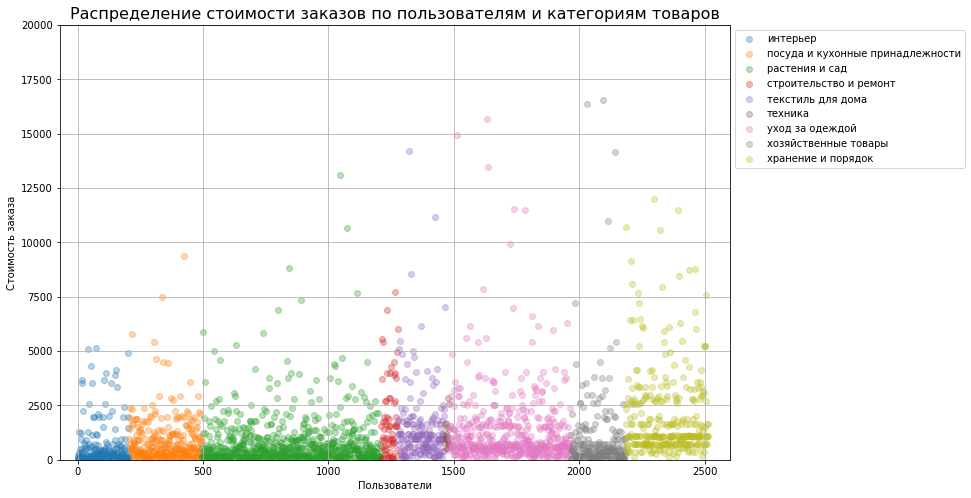

In [29]:
# Посмотрим в приближении
fig, ax = plt.subplots(figsize=(12,8))
for name in ordersbycustomer['category'].unique():
    df_customers = ordersbycustomer[ordersbycustomer['category'] == name]
    ax.scatter(df_customers.index, df_customers['revenue'], alpha=0.33, label = name)
    ax.axis([-70, 2600, 0, 20000])
ax.grid()
ax.legend(bbox_to_anchor=(1, 1))
plt.title('Распределение стоимости заказов по пользователям и категориям товаров', fontsize=16)
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.show()

Основная масса заказов лежит в диапазоне не выше 2.5 тысяч.

# Сегментация пользователей

In [30]:
# Проведем кластеризацию пользователей
clusters_data = df2.pivot_table(
    index = 'customer_id', 
    aggfunc = {'order_id': 'count','quantity': 'mean','price': 'mean', 'revenue': 'sum'}
)
clusters_data['avg_check']=clusters_data['revenue']/clusters_data['order_id']
clusters_data.sort_values(by='order_id', ascending=False)

,order_id,price,quantity,revenue,avg_check
customer_id,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,142,939.281690,1.901408,158292.0,1114.732394
d3b9ffea-d143-4747-8d59-74ab843d1ad6,51,57.294118,1.000000,2922.0,57.294118
4d93d3f6-8b24-403b-a74b-f5173e40d7db,42,722.833333,3.785714,51828.0,1234.000000
760aa067-90c3-4794-b7a9-a8831197388b,36,121.916667,1.027778,4558.0,126.611111
2a0acc09-e343-4f92-b5c0-f598ef2b07d4,31,38.000000,1.935484,2280.0,73.548387
...,...,...,...,...,...
5f7bbd5a-26dc-48ba-bcd8-19560f880fd3,1,749.000000,1.000000,749.0,749.000000
5f75c73a-1305-4079-b040-2bcb42085002,1,299.000000,1.000000,299.0,299.000000
5f6be5bf-7671-4e39-9b3d-b33b035b1e0b,1,134.000000,1.000000,134.0,134.000000


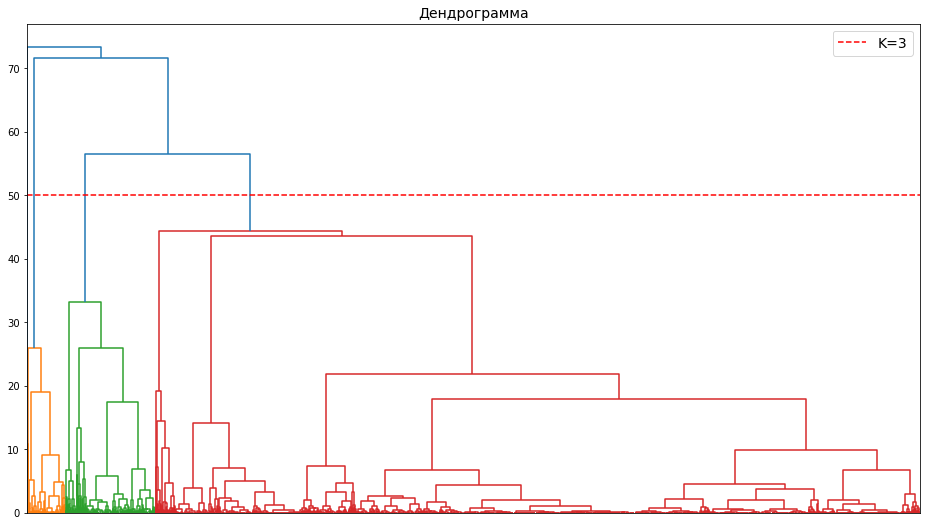

In [31]:
# Стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(clusters_data)

# Строим матрицу расстояний и визуализируем ее дендограммой
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(16, 9))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма', fontsize = 14)
plt.axhline(y=50, color='red', linestyle='--', label='K=3') 
plt.legend(fontsize = 14)
plt.show()

Дендограмма предлогает нам оптимальное число кластеров - три. Визуально оптимальное число кластеров 2.

In [32]:
# Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
km = KMeans(n_clusters=2, random_state=0)
km_clusters = km.fit_predict(X_sc)

# Cохраняем метки кластера в поле нашего датасета
clusters_data['cluster'] = km_clusters

# Оценим похожесть кластеров метрикой силуэта
df_sc = sc.fit_transform(clusters_data)
silhouette_score(df_sc, km_clusters)

0.7386387457927912

Значение метрики довольно высокое, что говорит об разделение на кластеры высокого качества.

In [33]:
# Выведем основные показатели по кластерам
df3 = clusters_data.groupby('cluster').mean().T
df3['all_mean'] = clusters_data.drop('cluster', axis=1).mean()
df3

cluster,0,1,all_mean
order_id,1.999080,2.035088,2.002497
price,501.891806,3512.430301,787.535908
quantity,2.096745,1.928766,2.080807
revenue,834.586667,5724.324561,1298.531835
avg_check,625.054985,4251.697942,969.155940


Итого мы получили 2 кластера

<b>Кластер 0</b>
* Среднее количество заказов - 2
* Среднее количество товара - 2
* Средняя цена товара в заказе - 501 д.е.
* Средний чек заказа 625 д.е.
* Средняя суммарная выручка 834 д.е.

<b>Кластер 1</b>

* Среднее количество заказов - 2
* Среднее количество товара - 2
* Средняя цена товара в заказе - 3512 д.е.
* Средний чек заказа 4251 д.е.
* Средняя суммарная выручка 5724 д.е.

Судя по всему к первому кластеру относятся люди преобретающие в магазине "по мелочи": рассаду, цветочки мелкие детали интерьера. Во втором кластере люди преобретающие товары более дорогих категорий например технику или дорогие сумки и тележки.
Конечно же нужно ориентироваться на кластер 1 т.к он приносит больше выручки.

# Проверка статистических гипотез

Гипотеза #1

<b>
H0: Количество заказов в октябре 2018 года равно количеству заказов в октябре 2019<br>
H1: Количество заказов в октябре 2018 года  НЕ равно количеству заказов в октябре 2019<br>
</b>

In [34]:
# Две независимые выборки
october2018 = df2.query('month == 10 & year == 2018')['order_id']
october2019 = df2.query('month == 10 & year == 2019')['order_id']

In [35]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(october2018, october2019)
print('p-value = {}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value = 1.141591778583908e-62
Отвергаем нулевую гипотезу


P-value значительно меньше 0,05. Значит, есть причины отвергать нулевую гипотезу и считать, что между количеством заказов в 2018 году и количеством заказов в 2019 есть различия. То есть, есть статистически значимое различие в количестве заказов в октебре от года к году.

Гипотеза #2

<b>
H0: Нет статистически значимых различий в среднем чеке между кластерами покупателей.<br>
H1: Есть статистически значимое различие в среднем чеке между между кластерами покупателей.<br>
</b>

In [36]:
# Две независимые выборки
cl0 = clusters_data[clusters_data['cluster']==0]['avg_check']
cl1 = clusters_data[clusters_data['cluster']==1]['avg_check']

In [37]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(cl0, cl1)
print('p-value = {}'.format(results.pvalue))
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value = 2.189886071443311e-133
Отвергаем нулевую гипотезу


P-value значительно меньше 0,05. Значит, есть причины отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. То есть, есть статистически значимое различие в среднем чеке между между кластерами покупателей.

# Выводы и рекомендации 

<b>Выводы:</b>:<br>
Мы располагаем данными за период с 2018-10-01 по 2019-10-31 т.е за год и один месяц.<br>
За это время оформлено 2732 заказа 2403 уникальными пользователями.
Пользователи делали в большинстве своем от одного до трех заказов (среднее 2).
Основная масса заказов лежит в диапазоне не выше 2.5 тысяч.


Начиная с февраля 2019 наблюдается увеличение числа заказов вплодь до пиковых значений в апреле и мае. После чего покупательская активность заметно снижается. Прослеживается сезонность. Количество заказов и выручка в октябре 2018 года на порядок выше тех же показателей 2019 года, что свидетельствект о негативном изменении спроса.

Топ-5 самых продаваемых товаров:
* цветок искусственный гвоздика пластиковая одиночная в ассортименте
* пеларгония розебудная red pandora укорененный черенок
* однолетнее растение петуния махровая в кассете 4 шт, россия
* ерш унитазный с деревянной ручкой , ваир 1712012
* пеларгония розебудная prins nikolai укорененный черенок

Самыми популярными товарами являются как правило товары из категорий "растения и сад" и "интерьер". Они довольно не дорогие и их берут по несколько штук за раз. 

Топ-5 самых прибыльных товаров:
* сумка-тележка 2-х колесная gimi argo синяя
* сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90
* урна уличная "гео", hobbyka/хоббика, 59*37,5см, сталь
* веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204
* сумка-тележка 3-х колесная gimi tris floral синяя

Самыми прибылиными товарами являются товары категории "хранение и порядок" за счет своих больших цен за еденицу товара.

Категории-лидеры по выручке:
* хранение и порядок
* уход за одеждой
* растения и сад

Категории-лидеры по среднему чеку:
* хранение и порядок
* техника
* текстиль для дома
* уход за одеждой
* строительство и ремонт

Провели кластеризацию пользователей и получили два кластера:<br>
Кластер 0:
* Среднее количество заказов - 2
* Среднее количество товара - 2
* Средняя цена товара в заказе - 501 д.е.
* Средний чек заказа 625 д.е.
* Средняя суммарная выручка 834 д.е.

Кластер 1:
* Среднее количество заказов - 2
* Среднее количество товара - 2
* Средняя цена товара в заказе - 3512 д.е.
* Средний чек заказа 4251 д.е.
* Средняя суммарная выручка 5724 д.е.

По результатам проверки гипотез:
* Количество заказов в октябре 2018 года отличается от количества заказов в октябре 2019
* Средний чек между кластерами покупателей различается.

<b>Рекомендации:</b>:<br>
* Проработать новые маркетинговые решения - ведь количеству заказов в день, месяц есть куда расти.
* Использовать сезонный фактор для категории "растения и сад" и увеличивать продажи путем рекомендаций в этот период.
* Для более платежеспособного кластера рекомендовать более прибыльные и дорогие товары.
* Изучить механизм конверсии покупателей в постоянные, ведь многие покупатели не совершают больше 1го заказа.
* Обратить внимание на "аномальных" клиентов. Скорее всего, это оптовики, для которых возможны особые условия.